In [4]:
import os
import cv2
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('~/Data/Metis/Steel/train.csv')

df['ImageId'] = df['ImageId_ClassId'].apply(lambda x: x.split('_')[0])
df['ClassId'] = df['ImageId_ClassId'].apply(lambda x: x.split('_')[1])
df['hasMask'] = ~ df['EncodedPixels'].isna()

print(df.shape)
df.head()

(50272, 5)


,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,True
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2,False
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3,False
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4,False
4,00031f466.jpg_1,NaN,00031f466.jpg,1,False


In [6]:
mask1= (df['hasMask'] == True) & (df['ClassId'] == '1')
mask2= (df['hasMask'] == True) & (df['ClassId'] == '2')
mask3= (df['hasMask'] == True) & (df['ClassId'] == '3')
mask4= (df['hasMask'] == True) & (df['ClassId'] == '4')

df_1=df[mask1]
print(df_1.shape)

df_2=df[mask2]
print(df_2.shape)

df_3=df[mask3]
print(df_3.shape)

df_4=df[mask4]
print(df_4.shape)


df_1.head()

(897, 5)
(247, 5)
(5150, 5)
(801, 5)


,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,True
20,000a4bcdd.jpg_1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,000a4bcdd.jpg,1,True
56,002fc4e19.jpg_1,146021 3 146275 10 146529 40 146783 46 147038 ...,002fc4e19.jpg,1,True
136,008ef3d74.jpg_1,356336 4 356587 11 356838 18 357089 25 357340 ...,008ef3d74.jpg,1,True
148,00ac8372f.jpg_1,101742 3 101998 12 102253 19 102301 22 102509 ...,00ac8372f.jpg,1,True


In [7]:
df.head()

,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,True
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2,False
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3,False
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4,False
4,00031f466.jpg_1,NaN,00031f466.jpg,1,False


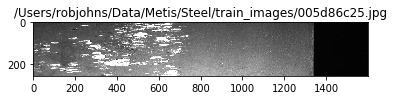

In [8]:
img_name = df["ImageId"][78]
#img_name = '0025bde0c.jpg'
abs_path = "/Users/robjohns/Data/Metis/Steel/train_images/"
filename=abs_path+img_name
impath = Path(filename)


if impath.exists() == True :
    seed_image = cv2.imread(filename)
    plt.imshow(seed_image)
    plt.title(str(impath))
    plt.show()
    
else:
    print('image/the limit does not exist')

In [116]:
seed_image.min()

0

In [12]:
## Showing defect ROI's
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]


In [96]:
name_and_mask(20)

('000a4bcdd.jpg', array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8))

In [87]:
ma.shape


(256, 1600, 4)

In [ ]:
https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda

In [74]:
train_df = pd.read_csv('~/Data/Metis/Steel/train.csv')

def name_and_mask(start_idx):
    #in data set, each images has 4 rows, this grabs all 4 and makes sure image name matches
    
    col = start_idx
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
    
    # This takes the 4 values of tagged pixels for each of the 4 defect tags 
    #for the current image
    labels = train_df.iloc[col:col+4, 1]
    
    #makes an empty mask that is 256x1600 pixels with 4 layers for each pixel
    mask = np.zeros((256, 1600, 4), dtype=np.uint8)

    
    #
    for idx, label in enumerate(labels.values):
        
# 4 times, once for each layer, the label, which is the dice code is processed
# the output will leave all 0's for the mask we made above if there is no dice code
# or the dice will be converted to changing the mask on that layer
        
        if label is not np.nan:
            mask_label = np.zeros(1600*256, dtype=np.uint8)
            label = label.split(" ")

#makes a list out of non-zero labels, alternating between positions and lengths
            
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            
#makes lists of positions and lengths by iterating every other, 
#and forces them to become int          
            
            for pos, le in zip(positions, length):
                mask_label[pos-1:pos+le-1] = 1
            mask[:, :, idx] = mask_label.reshape(256, 1600, order='F')
# the positions called in label are turned to 1 in the mask for this layer
    
    return img_names[0], mask

In [90]:
def show_mask_image(col):
    name, mask = name_and_mask(col)
    abs_path = "/Users/robjohns/Data/Metis/Steel/train_images/"
    filename=abs_path+name
    impath = Path(filename)
    img = cv2.imread(filename)
    print(img.shape)
    fig, ax = plt.subplots(figsize=(15, 15))

    for ch in range(4):
        contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[ch], 2)
    ax.set_title(name)
    ax.imshow(img)
    plt.show()

(256, 1600, 3)


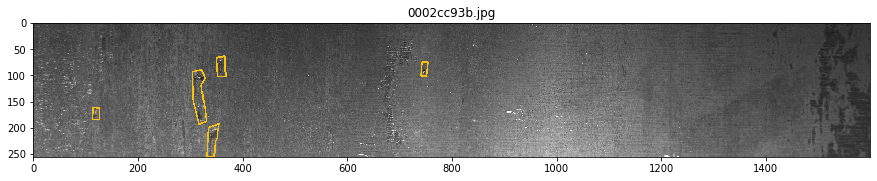

In [91]:
show_mask_image(0)

In [89]:
img.shape

NameError: name 'img' is not defined

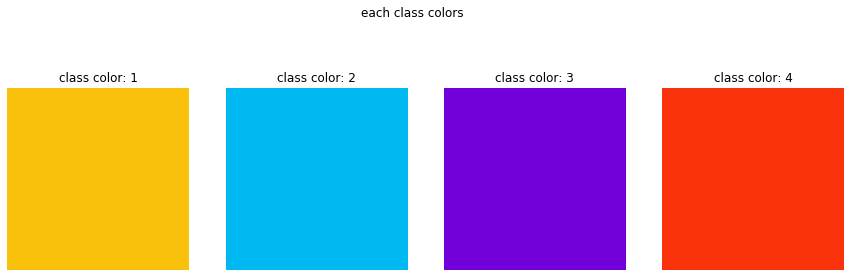

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class color: {}".format(i+1))
fig.suptitle("each class colors")

plt.show()

In [110]:
idx_no_defect = []
idx_class_1 = []
idx_class_2 = []
idx_class_3 = []
idx_class_4 = []
idx_class_multi = []
idx_class_any = []

for col in range(0, len(train_df), 4):
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
        
    labels = train_df.iloc[col:col+4, 1]
    if labels.isna().all():
        idx_no_defect.append(col)
    elif (labels.isna() == [False, True, True, True]).all():
        idx_class_1.append(col)
        idx_class_any.append(col)
    elif (labels.isna() == [True, False, True, True]).all():
        idx_class_2.append(col)
    elif (labels.isna() == [True, True, False, True]).all():
        idx_class_3.append(col)
        idx_class_any.append(col)
    elif (labels.isna() == [True, True, True, False]).all():
        idx_class_4.append(col)
        idx_class_any.append(col)
    else:
        idx_class_multi.append(col)
        

In [111]:
len(idx_no_defect),len(idx_class_any),len(idx_class_multi)

(5902, 6044, 427)

In [112]:
5902+6044+427

12373

(256, 1600, 3)


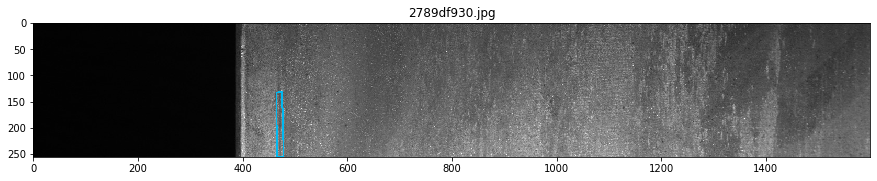

(256, 1600, 3)


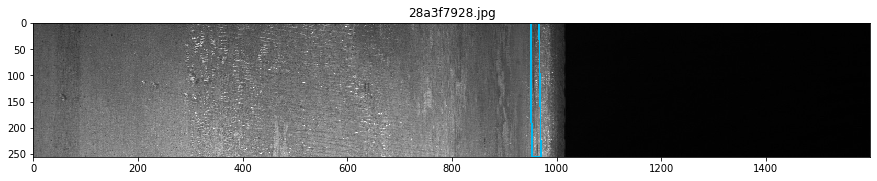

(256, 1600, 3)


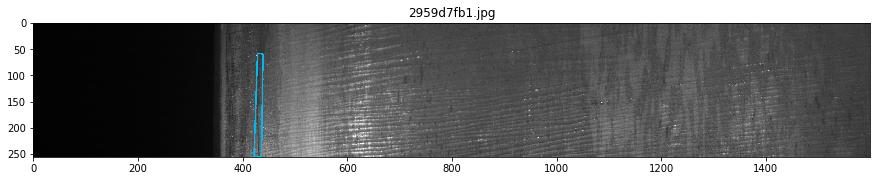

(256, 1600, 3)


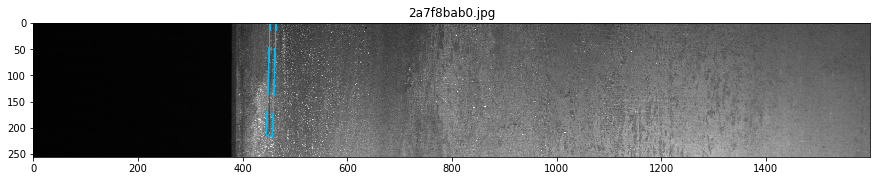

(256, 1600, 3)


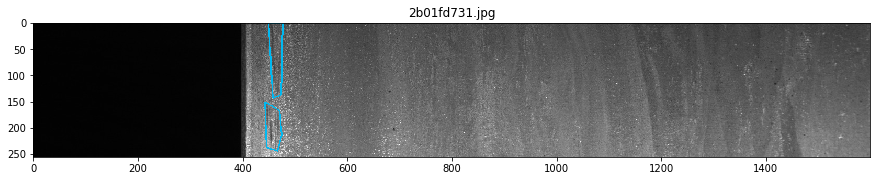

In [120]:
for idx in idx_class_2[40:45]:
    show_mask_image(idx)

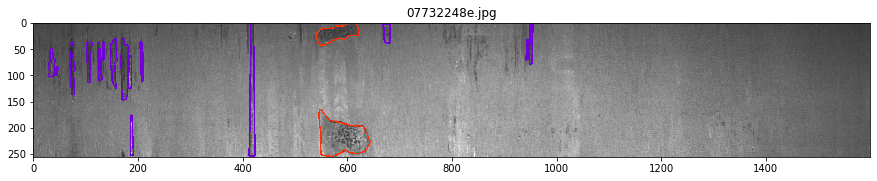

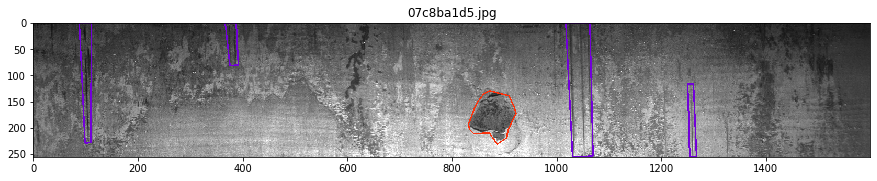

In [76]:
for idx in idx_class_multi[10:12]:
    show_mask_image(idx)